This is analysis for the EDA

In [1]:
# Import libraries
import os, json, csv
from genericpath import exists
from turtle import title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from collections import defaultdict
import pyLDAvis
from textstat import flesch_reading_ease
from wordcloud import WordCloud, STOPWORDS

c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
reports = pd.read_csv('open_ave_data.csv')
reports = reports.dropna()
reports.head(3)

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.


array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

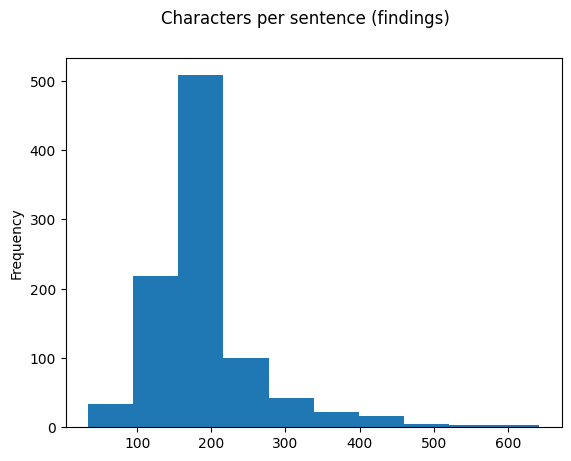

In [3]:
# Range of characters per sentence (findings)
reports['findings'].str.len().plot(kind='hist', subplots=True, title="Characters per sentence (findings)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

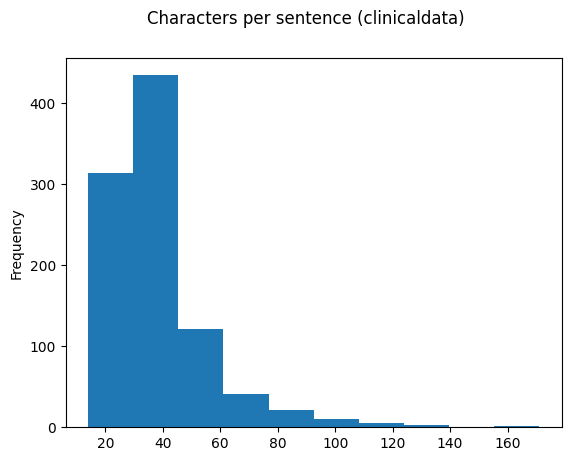

In [4]:
# Range of characters per sentence (clinicaldata)
reports['clinicaldata'].str.len().plot(kind='hist', subplots=True, title="Characters per sentence (clinicaldata)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

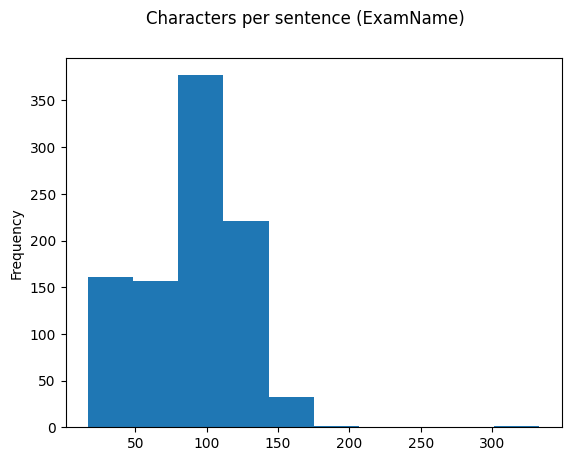

In [5]:
# Range of characters per sentence (ExamName)
reports['ExamName'].str.len().plot(kind='hist', subplots=True, title="Characters per sentence (ExamName)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

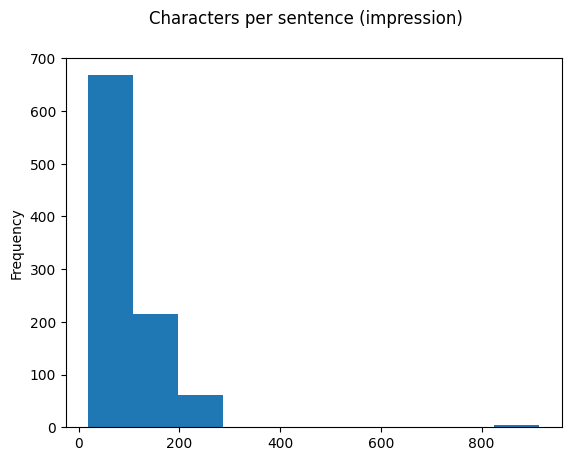

In [6]:
# Range of characters per sentence (impression)
reports['impression'].str.len().plot(kind='hist', subplots=True, title="Characters per sentence (impression)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

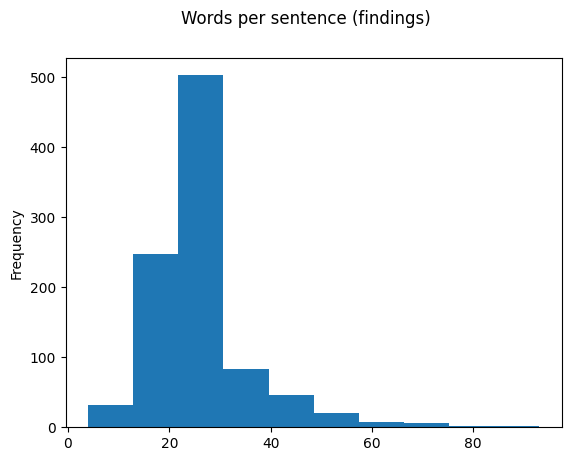

In [7]:
# Range of words per sentence (findings)
reports['findings'].str.split().map(lambda x: len(x)).plot(kind='hist', subplots=True, title="Words per sentence (findings)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

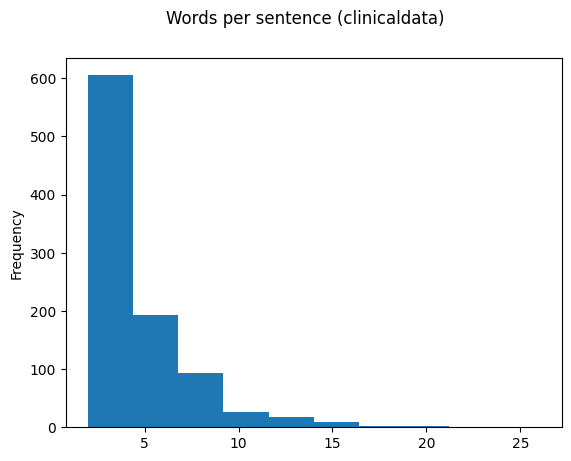

In [8]:
# Range of words per sentence (clinicaldata)
reports['clinicaldata'].str.split().map(lambda x: len(x)).plot(kind='hist', subplots=True, title="Words per sentence (clinicaldata)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

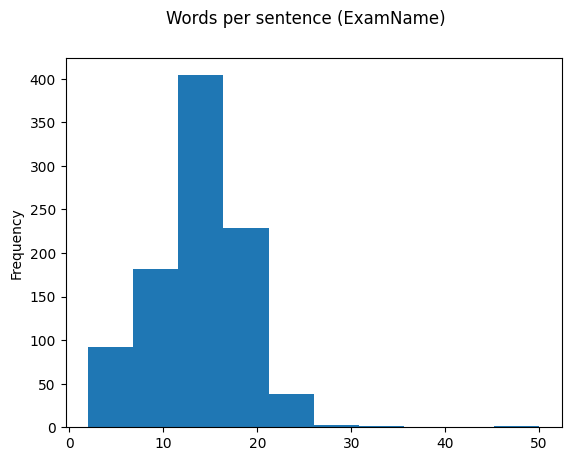

In [9]:
# Range of words per sentence (ExamName)
reports['ExamName'].str.split().map(lambda x: len(x)).plot(kind='hist', subplots=True, title="Words per sentence (ExamName)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

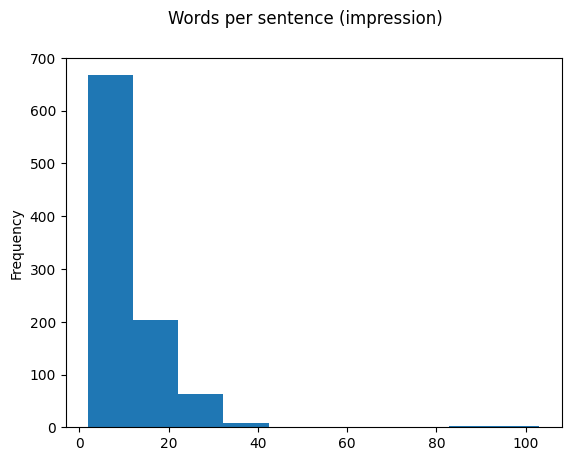

In [10]:
# Range of words per sentence (impression)
reports['impression'].str.split().map(lambda x: len(x)).plot(kind='hist', subplots=True, title="Words per sentence (impression)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

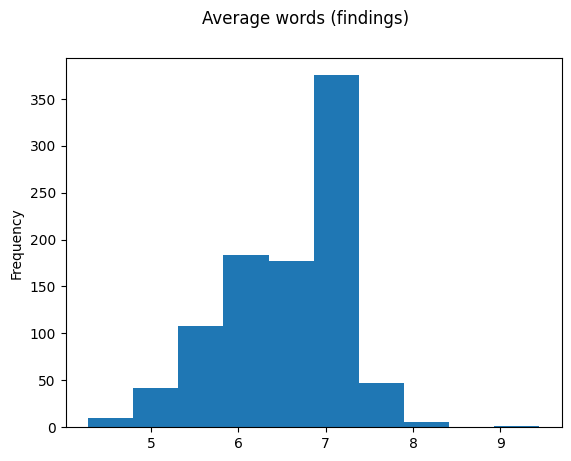

In [11]:
# Range of average length of words per sentence (findings)
reports['findings'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).plot(kind='hist', subplots=True, title="Average words (findings)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

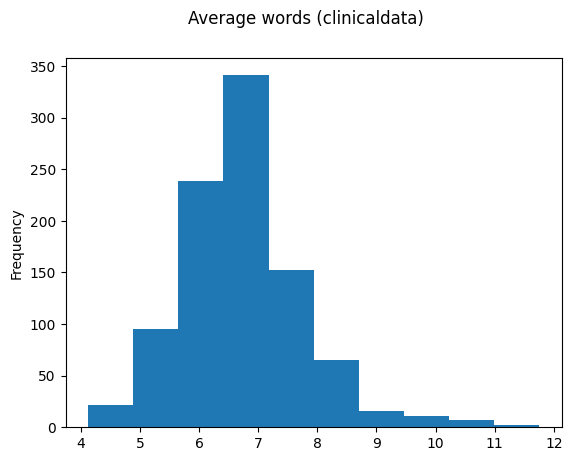

In [12]:
# Range of average length of words per sentence (clinicaldata)
reports['clinicaldata'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).plot(kind='hist', subplots=True, title="Average words (clinicaldata)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

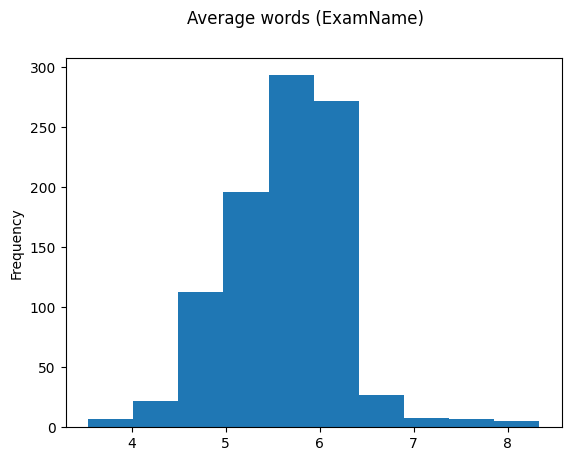

In [13]:
# Range of average length of words per sentence (ExamName)
reports['ExamName'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).plot(kind='hist', subplots=True, title="Average words (ExamName)")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

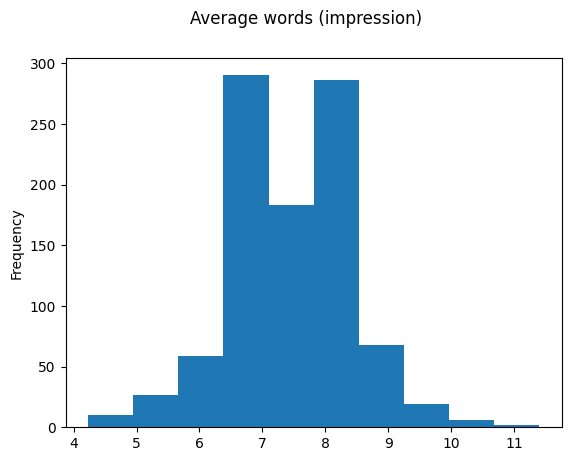

In [14]:
# Range of average length of words per sentence (impression)
reports['impression'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).plot(kind='hist', subplots=True, title="Average words (impression)")

In [15]:
# Get all the english stopwords to see actual length
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elefe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

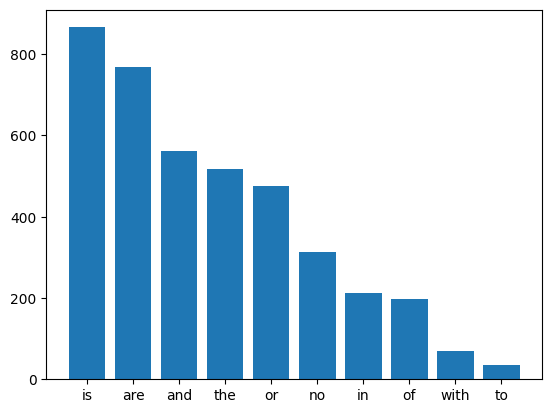

In [16]:
# Stopwords
corpus = []
report = reports['findings'].str.split()
report = report.tolist()
corpus = [word for i in report if isinstance(i, list) for word in i]
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*top)
plt.bar(x, y)


<AxesSubplot: >

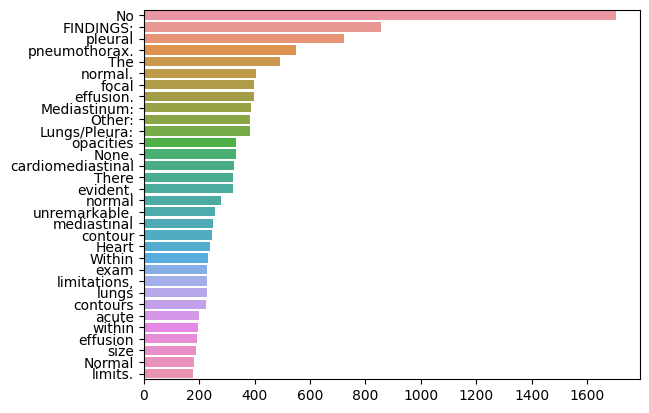

In [17]:
# Word-level analysis findings
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<BarContainer object of 10 artists>

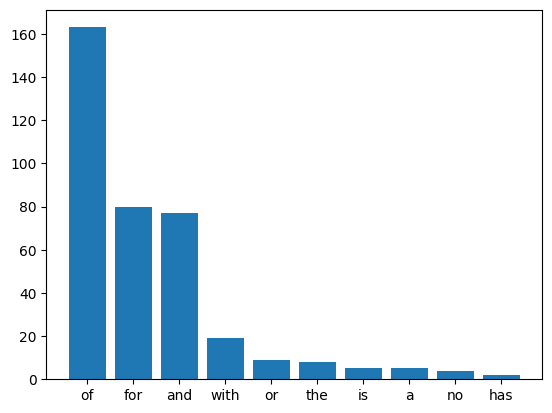

In [18]:
# Stopwords
corpus=[]
report= reports['clinicaldata'].str.split()
report=report.tolist()
corpus=[word for i in report if isinstance(i, list) for word in i ]
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot: >

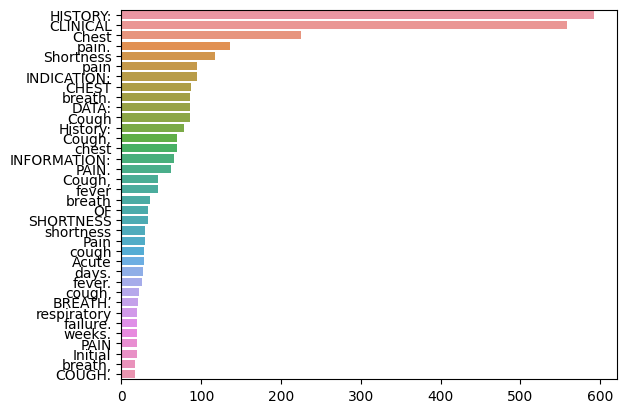

In [19]:
# Word-level analysis clinicaldata
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<BarContainer object of 10 artists>

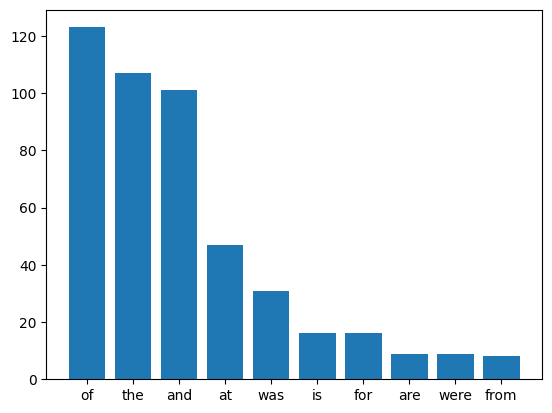

In [20]:
# Stopwords
corpus=[]
report= reports['ExamName'].str.split()
report=report.tolist()
corpus=[word for i in report if isinstance(i, list) for word in i ]
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot: >

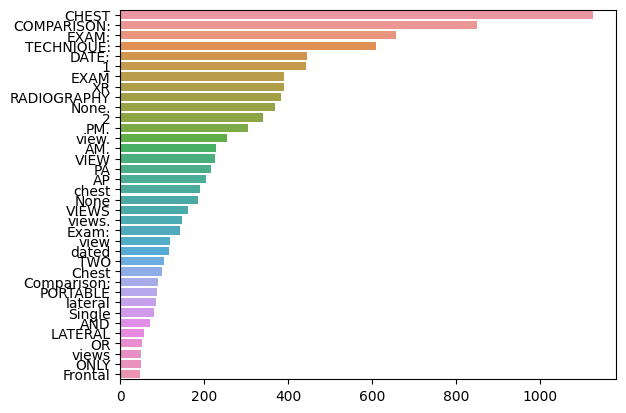

In [21]:
# Word-level analysis ExamName
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<BarContainer object of 10 artists>

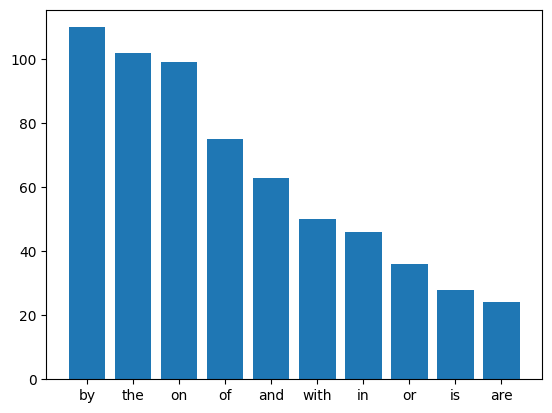

In [22]:
# Stopwords
corpus=[]
report= reports['impression'].str.split()
report=report.tolist()
corpus=[word for i in report if isinstance(i, list) for word in i ]
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot: >

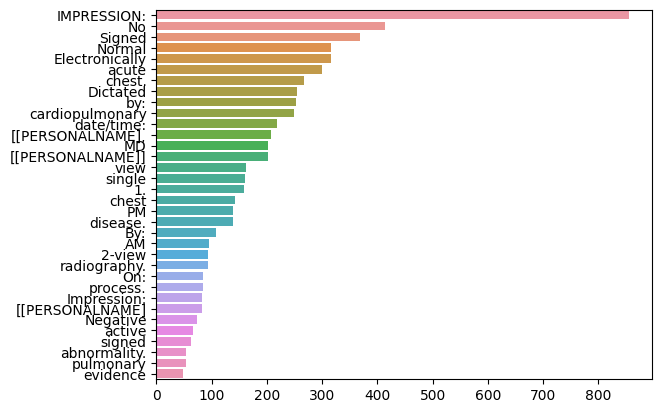

In [23]:
# Word-level analysis impression
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [24]:
# Top ngrams - change the second parameter for more grams
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.tolist()
    corpus=[word for i in new if isinstance(i, list) for word in i]
    text = text.dropna()
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

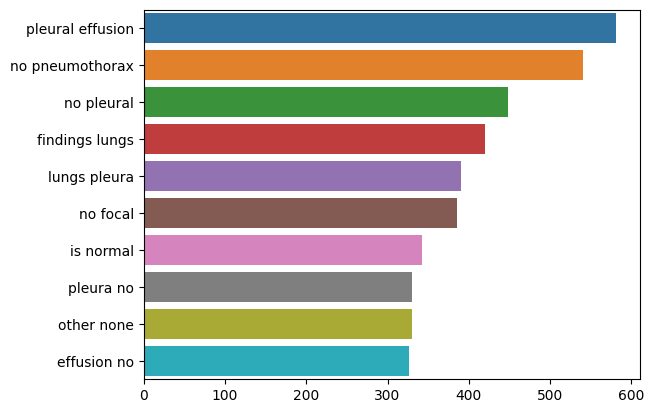

In [25]:
# Top ngrams findings
plot_top_ngrams_barchart(reports['findings'],2)

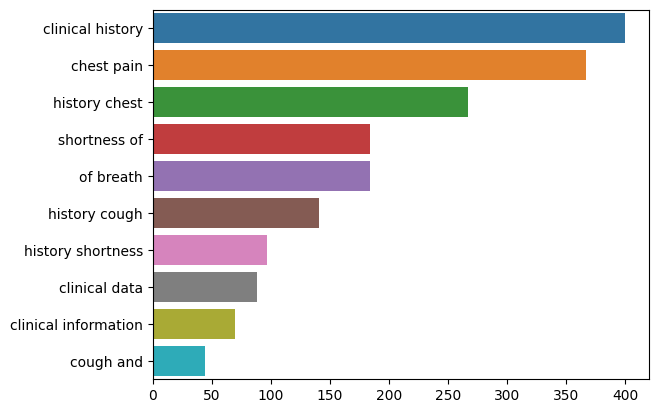

In [26]:
# Top ngrams clinicaldata
plot_top_ngrams_barchart(reports['clinicaldata'],2)

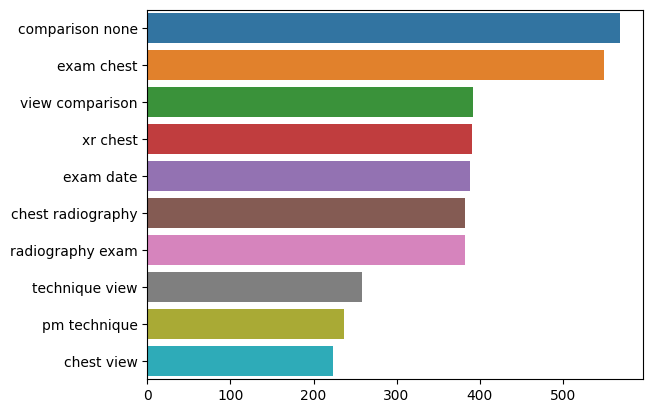

In [27]:
# Top ngrams ExamName
plot_top_ngrams_barchart(reports['ExamName'],2)

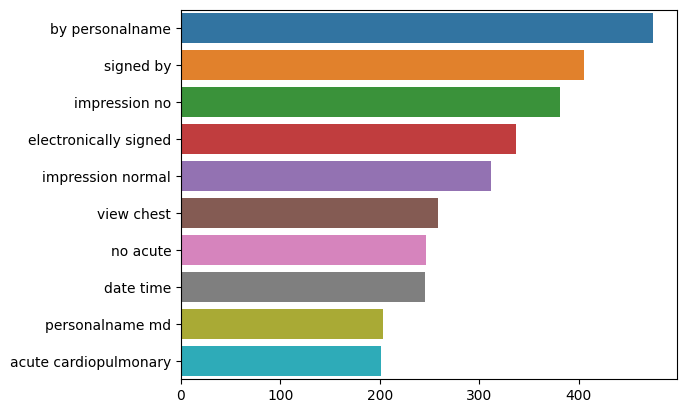

In [28]:
# Top ngrams impression
plot_top_ngrams_barchart(reports['impression'],2)

In [29]:
# Reupdate stopwords for the wordcloud
stopwords = set(STOPWORDS)

In [30]:
# Create wordcloud
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

In [31]:
# LDA modeling function
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df, string):
    df = df.dropna()
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df[string]:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elefe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elefe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# LDA findings
corpus=preprocess_news(reports, 'findings')
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.038*"normal" + 0.036*"The" + 0.033*"FINDINGS" + 0.031*"size" + 0.028*"within" + 0.028*"clear" + 0.027*"limit" + 0.020*"effusion" + 0.020*"pneumothorax" + 0.019*"tube"'),
 (1,
  '0.074*"There" + 0.066*"The" + 0.038*"normal" + 0.037*"FINDINGS" + 0.037*"pleural" + 0.036*"effusion" + 0.032*"acute" + 0.031*"lung" + 0.028*"pneumothorax" + 0.028*"silhouette"'),
 (2,
  '0.061*"FINDINGS" + 0.058*"effusion" + 0.057*"pneumothorax" + 0.057*"pleural" + 0.055*"contour" + 0.048*"Mediastinum" + 0.047*"Lungs/Pleura" + 0.047*"Other" + 0.044*"opacity" + 0.043*"focal"'),
 (3,
  '0.091*"Normal" + 0.040*"FINDINGS" + 0.036*"mass" + 0.030*"pulmonary" + 0.027*"visible" + 0.027*"pleural" + 0.024*"bone" + 0.024*"adenopathy" + 0.021*"abnormality" + 0.021*"Lungs"')]

c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud

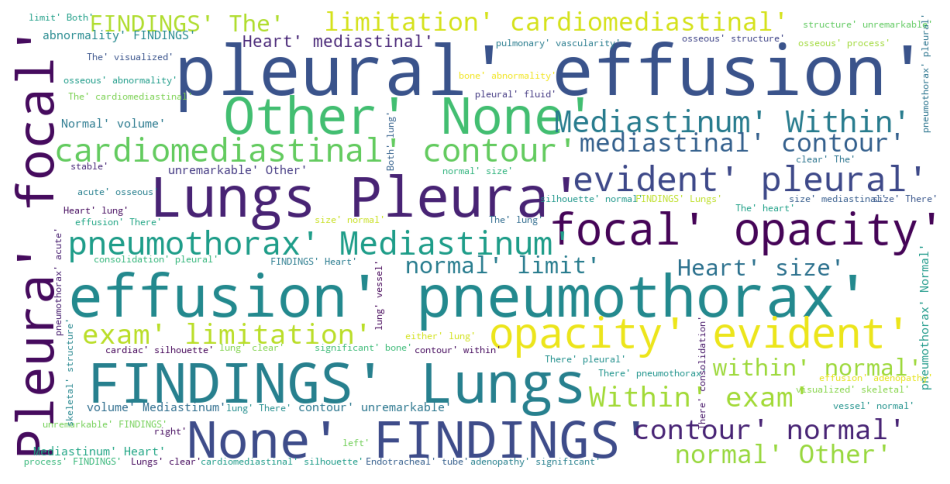

In [33]:
show_wordcloud(corpus)

In [34]:
# LDA clinicaldata
corpus=preprocess_news(reports, 'clinicaldata')
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.204*"HISTORY" + 0.171*"CLINICAL" + 0.164*"Chest" + 0.145*"pain" + 0.054*"Cough" + 0.026*"Pain" + 0.024*"DATA" + 0.015*"respiratory" + 0.014*"failure" + 0.013*"INFORMATION"'),
 (1,
  '0.126*"History" + 0.099*"chest" + 0.075*"pain" + 0.050*"HISTORY" + 0.032*"CHEST" + 0.031*"INDICATION" + 0.025*"PAIN" + 0.019*"Clinical" + 0.018*"Respiratory" + 0.018*"DYSPNEA"'),
 (2,
  '0.114*"Cough" + 0.097*"CLINICAL" + 0.074*"fever" + 0.064*"cough" + 0.062*"INDICATION" + 0.056*"HISTORY" + 0.034*"INFORMATION" + 0.031*"week" + 0.027*"day" + 0.025*"DATA"'),
 (3,
  '0.189*"HISTORY" + 0.179*"CLINICAL" + 0.105*"breath" + 0.099*"Shortness" + 0.057*"PAIN" + 0.056*"CHEST" + 0.028*"BREATH" + 0.028*"SHORTNESS" + 0.025*"COUGH" + 0.020*"DATA"')]

c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud

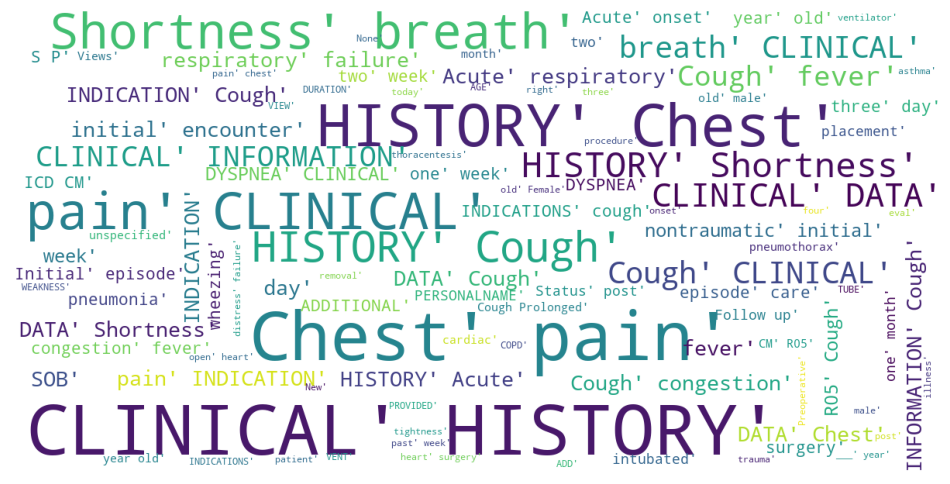

In [35]:
show_wordcloud(corpus)

In [36]:
# LDA ExamName
corpus=preprocess_news(reports, 'ExamName')
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.124*"EXAM" + 0.106*"CHEST" + 0.093*"COMPARISON" + 0.076*"TECHNIQUE" + 0.068*"None" + 0.065*"view" + 0.045*"DATE" + 0.039*"VIEW" + 0.034*"chest" + 0.033*"RADIOGRAPHY"'),
 (1,
  '0.048*"x-ray" + 0.046*"chest" + 0.045*"COMPARISON" + 0.039*"Chest" + 0.032*"lateral" + 0.030*"performed" + 0.027*"portable" + 0.023*"view" + 0.021*"CHEST" + 0.019*"EXAMINATION"'),
 (2,
  '0.121*"CHEST" + 0.066*"VIEWS" + 0.061*"COMPARISON" + 0.054*"Exam" + 0.049*"None" + 0.044*"dated" + 0.043*"TWO" + 0.036*"Comparison" + 0.034*"Chest" + 0.020*"chest"'),
 (3,
  '0.140*"EXAM" + 0.102*"CHEST" + 0.077*"DATE" + 0.075*"COMPARISON" + 0.075*"view" + 0.070*"TECHNIQUE" + 0.067*"RADIOGRAPHY" + 0.040*"None" + 0.013*"PORTABLE" + 0.012*"VIEW"')]

c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud

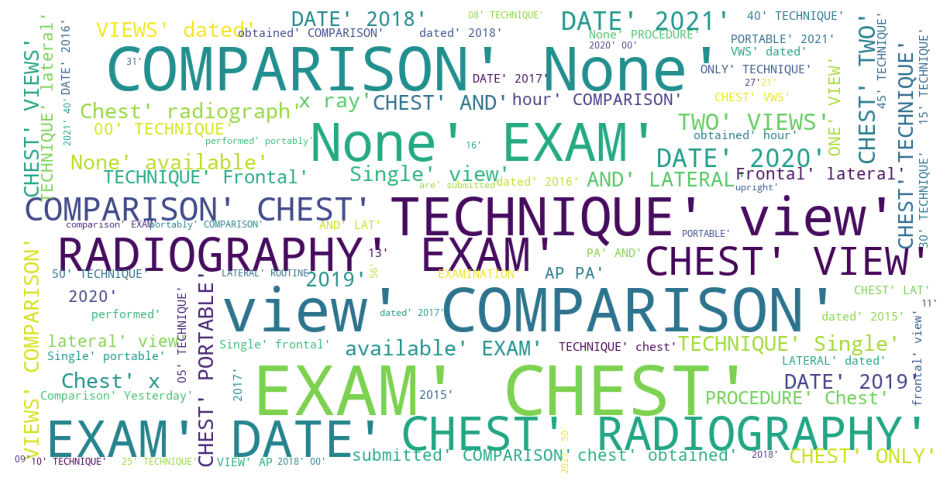

In [37]:
show_wordcloud(corpus)

In [38]:
# LDA impression
corpus=preprocess_news(reports, 'impression')
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.056*"IMPRESSION" + 0.053*"PERSONALNAME" + 0.051*"Electronically" + 0.046*"Signed" + 0.022*"Impression" + 0.017*"opacity" + 0.015*"lung" + 0.015*"consolidation" + 0.014*"exam" + 0.013*"prior"'),
 (1,
  '0.133*"IMPRESSION" + 0.118*"chest" + 0.085*"Normal" + 0.073*"PERSONALNAME" + 0.068*"view" + 0.066*"single" + 0.053*"Signed" + 0.031*"Negative" + 0.025*"Electronically" + 0.010*"active"'),
 (2,
  '0.112*"IMPRESSION" + 0.083*"chest" + 0.078*"Normal" + 0.063*"radiography" + 0.063*"2-view" + 0.015*"effusion" + 0.014*"pleural" + 0.014*"left" + 0.011*"disease" + 0.011*"airspace"'),
 (3,
  '0.092*"acute" + 0.087*"IMPRESSION" + 0.082*"Dictated" + 0.079*"PERSONALNAME" + 0.077*"cardiopulmonary" + 0.069*"date/time" + 0.053*"Electronically" + 0.053*"Signed" + 0.044*"disease" + 0.030*"process"')]

c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\elefe\OneDrive\Documents\Programming\Internships\OpenAv ML\venv\lib\site-packages\wordcloud

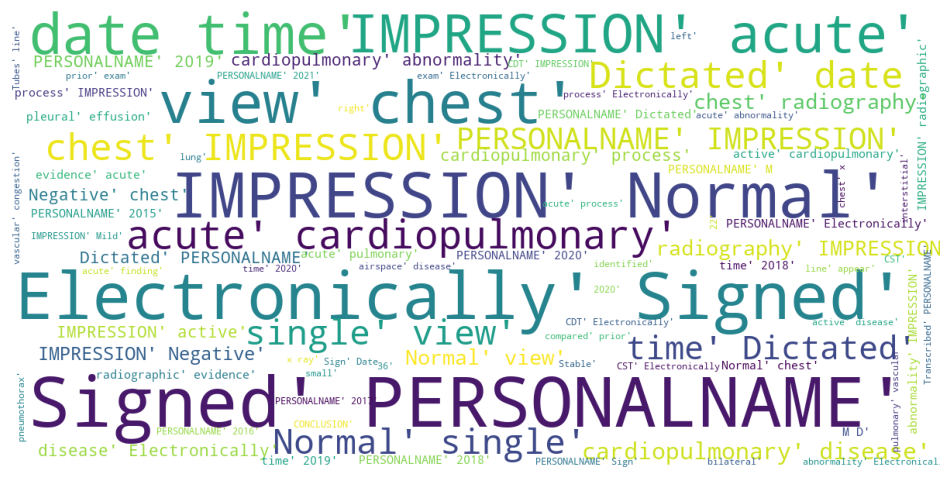

In [39]:
show_wordcloud(corpus)

In [40]:
# POS tagging
nltk.download('averaged_perceptron_tagger')
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elefe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<AxesSubplot: >

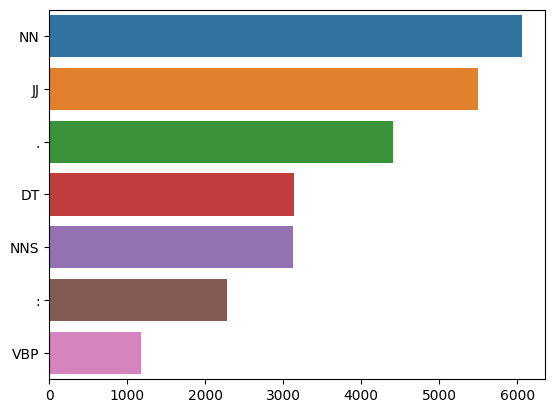

In [41]:
# Text tagging findings
tags=reports['findings'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

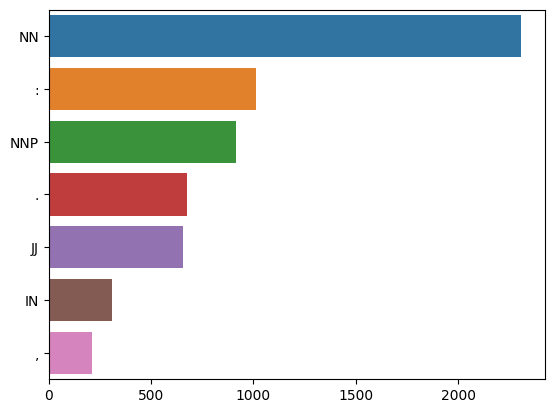

In [42]:
# Text tagging clinicaldata
tags=reports['clinicaldata'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

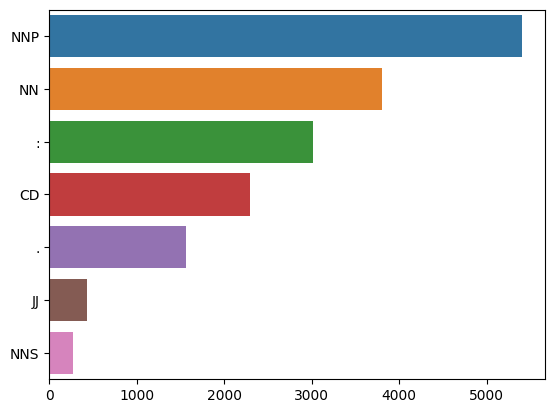

In [43]:
# Text tagging ExamName
tags=reports['ExamName'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

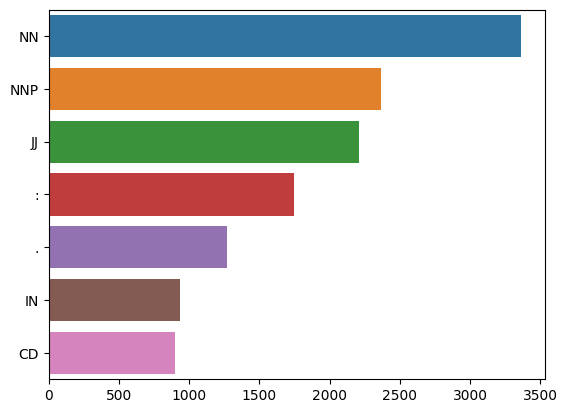

In [44]:
# Text tagging impression
tags=reports['impression'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [45]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

<AxesSubplot: >

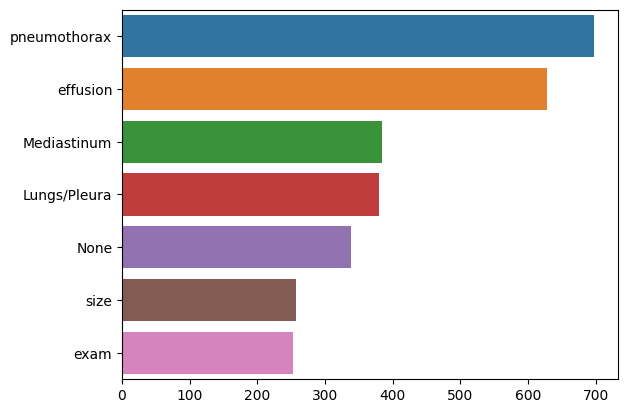

In [46]:
# Adj tagging findings
words=reports['findings'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

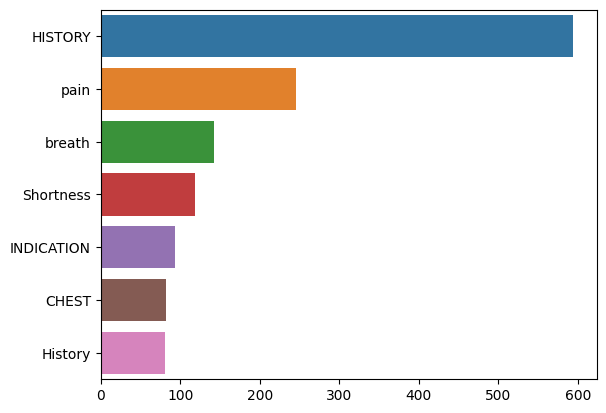

In [47]:
# Adj tagging clinicaldata
words=reports['clinicaldata'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

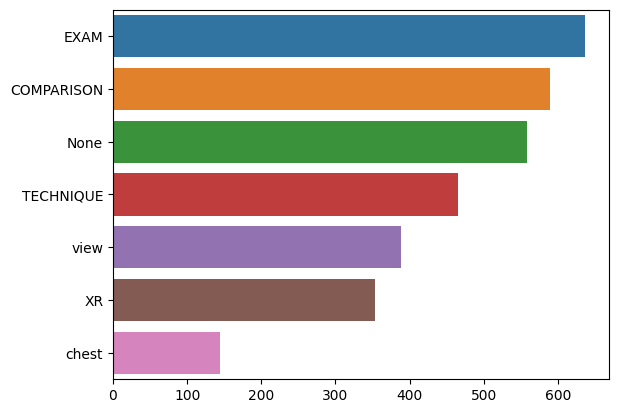

In [48]:
# Adj tagging ExamName
words=reports['ExamName'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot: >

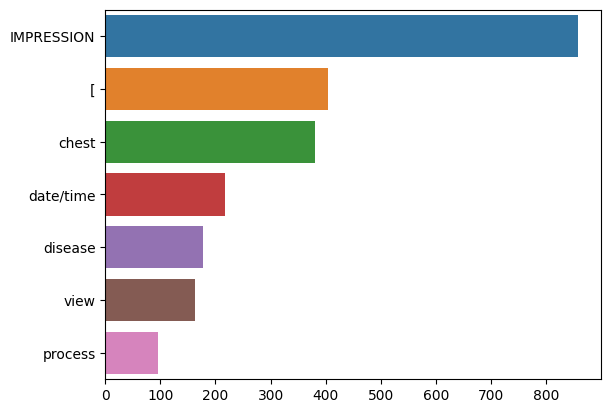

In [49]:
# Adj tagging impression
words=reports['impression'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

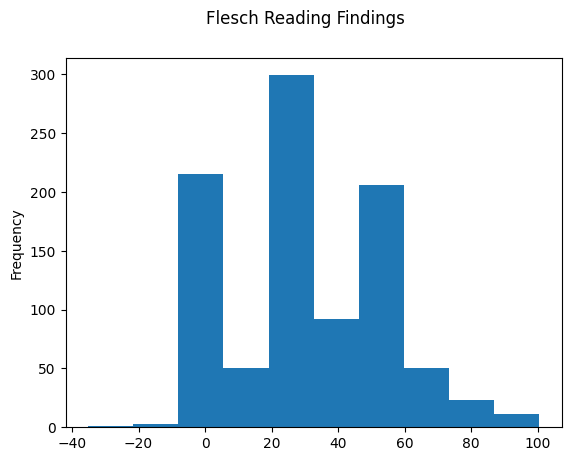

In [50]:
# Ease score findings
reports['findings'].apply(lambda x : flesch_reading_ease(x)).plot(kind='hist', subplots=True, title="Flesch Reading Findings")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

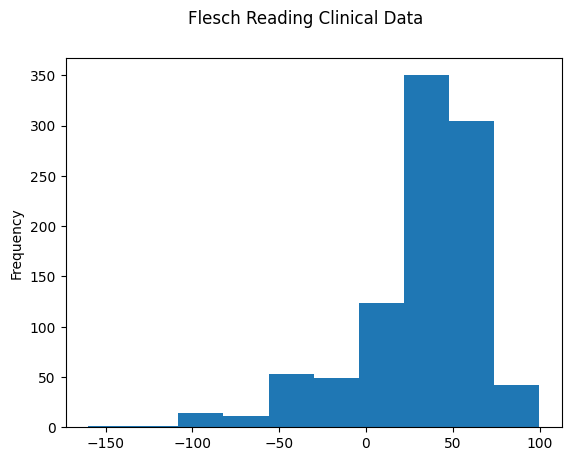

In [51]:
# Ease score clinicaldata
reports['clinicaldata'].apply(lambda x : flesch_reading_ease(x)).plot(kind='hist', subplots=True, title="Flesch Reading Clinical Data")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

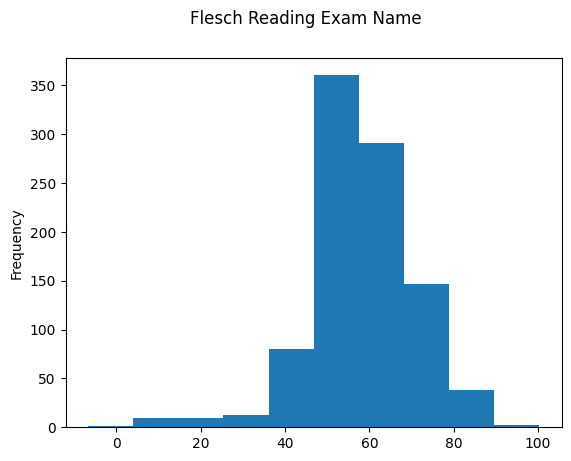

In [52]:
# Ease score ExamName
reports['ExamName'].apply(lambda x : flesch_reading_ease(x)).plot(kind='hist', subplots=True, title="Flesch Reading Exam Name")

array([<AxesSubplot: ylabel='Frequency'>], dtype=object)

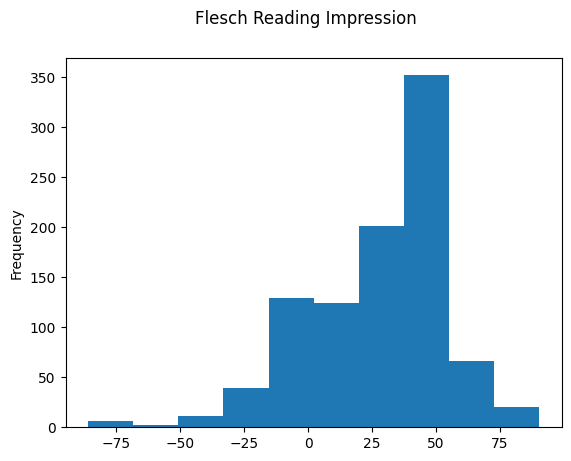

In [53]:
# Ease score impression
reports['impression'].apply(lambda x : flesch_reading_ease(x)).plot(kind='hist', subplots=True, title="Flesch Reading Impression")